In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
file_path = "/disk_4/uddeshya/Test-merge/merged_test_unique_sample.csv"
test_data = pd.read_csv(file_path, usecols=['cleaned_address', 'pincode', 'state']).drop_duplicates(subset='cleaned_address')
test_data = test_data[:1280]
test_data['pincode'] = test_data['pincode'].astype(int).astype(str)
unique_states = test_data['state'].unique()
unique_state_count = len(unique_states)

pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)
merged_data = test_data.merge(df_mapping, left_on='pincode', right_on='Pincode', how='right')
print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))
matched_data = merged_data.dropna(subset=['State'])

Merged Data Sample with NaN values:
1358


In [5]:
def plot_state_heatmap(matched_data, shapefile_path):

    state_address_counts = matched_data['State'].value_counts().to_dict()
    state_counts_df = pd.DataFrame(list(state_address_counts.items()), columns=['State', 'Address_Count'])
    gdf_india = gpd.read_file(shapefile_path)
    gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
    state_counts_df['State'] = state_counts_df['State'].str.upper()
    
    state_counts_df = state_counts_df.replace({'State': {'TAMIL NADU': 'TAMILNADU', 'CHHATTISGARH': 'CHHATTISHGARH', 'TELANGANA': 'TELENGANA'}})
    gdf_merged = gdf_india.set_index('State_Name').join(state_counts_df.set_index('State'), how='left')
    
    gdf_merged['Address_Count'] = gdf_merged['Address_Count'].fillna(0)
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf_merged.plot(column='Address_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title('State-wise Address Count Heat Map', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.axis('off')
    plt.show()

shapefile_path = "/home/uddeshya.singh/Experiments/India-shape" 

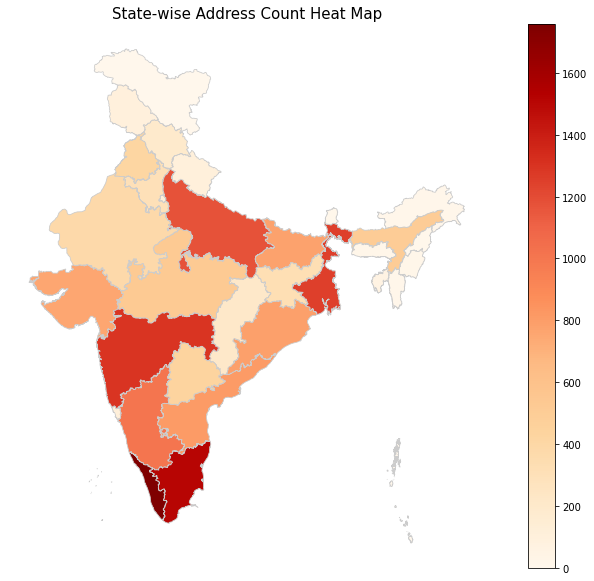

In [6]:
plot_state_heatmap(matched_data, shapefile_path)